Perceptron com a base de dados Wine Recognition
--

Importaçōes das bibliotecas


In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# versions
print(f'numpy:{np.__version__}\npandas:{pd.__version__}')


numpy:1.24.3
pandas:2.0.1


Primeiramente configurar o pyplot para apresentar nossas imagens.

In [2]:
plt.style.use('dark_background')  # "dark" theme
plt.rcParams["font.size"] = 12

plt.rcParams["figure.figsize"] = (10, 4)

In [3]:
#CLASSE PERCEPTRON CRIADA NA AULA 01

class Perceptron:
    """
    A Perceptron is a type of artificial neural network that can be used for binary classification problems.
    
    This class implements a Perceptron model using the heaviside activation function and a gradient descent-based
    algorithm for training. The model can be used for both training and prediction tasks.
    
    Parameters:
    -----------
    learning_rate : float
        The learning rate controls the step size of the gradient descent algorithm during training. It determines
        how quickly the model learns from the training data. A smaller learning rate may result in slower convergence,
        while a larger learning rate may cause the algorithm to overshoot the minimum of the loss function.
        
    epochs : int
        The number of epochs specifies how many times the entire training dataset should be passed through the model
        during training. One epoch consists of iterating through all the training examples once. Increasing the number
        of epochs may improve the performance of the model, but also increases the training time.
    """

    def __init__(self, learning_rate=0.1, epochs=100):
        """
        Initialize a new Perceptron instance with the specified learning rate and number of epochs.
        
        Parameters:
        -----------
        learning_rate : float
            The learning rate controls the step size of the gradient descent algorithm during training.
            
        epochs : int
            The number of epochs specifies how many times the entire training dataset should be passed through the
            model during training.
        """      
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs


    def activation(self, z):
        """
        The activation function computes the output of the Perceptron given its input.
        
        This implementation uses the heaviside activation function, which returns 1 if the input is greater than or
        equal to zero, and 0 otherwise.
        
        Parameters:
        -----------
        z : float
            The input to the activation function, which is the dot product of the input features and the model weights
            plus the bias term.
            
        Returns:
        --------
        float
            The output of the activation function.
        """      
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation


    def fit(self, X, y):
        """
        Train the Perceptron on the provided training data using the gradient descent algorithm.
        
        This method updates the model weights and bias term using the specified learning rate and number of epochs,
        until the algorithm converges or the maximum number of epochs is reached.
        
        Parameters:
        -----------
        X : numpy.ndarray
            A 2D array of shape (n_samples, n_features) containing the input features for each training example.
            
        y : numpy.ndarray
            A 1D array of shape (n_samples,) containing the target binary class labels for each training example.
            The values should be either 0 or 1.
            
        Returns:
        --------
        tuple
            A tuple containing the trained weights and bias term of the Perceptron.
        """      
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                #Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias


    def predict(self, X):
        """
        Predicts the binary class label for input data X.
          
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            The input data.
        
        Returns:
        --------
        ndarray, shape (n_samples,)
            The binary class labels predicted by the perceptron.
        """
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)               

_____
Importando Datasets
--

In [4]:
from sklearn import datasets

wine = datasets.load_wine()

print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


## Criando o Dataframe com pandas

In [5]:
df_wine = pd.DataFrame(
    data= np.c_[wine['data'], wine['target']],
    columns= wine['feature_names'] + ['target']
    )

df_wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Como podemos observar, o ``DataFrame``gerado contém 13 Dimensōes que são as informacoes de cada tipo de Vinho. Também há uma coluna ``target`` indicando a codificação numérica de cada Tipo do Vinho Classe 0, 1 e 2

Agora Vamos ver a qunatidade Amostras por Classe

In [6]:
df_wine.groupby('target').size()

target
0.0    59
1.0    71
2.0    48
dtype: int64

Vendo o Shape do Dataframe
--

In [7]:
print('Shape')
print(df_wine.shape)

Shape
(178, 14)


## Vamos separar as Classe e ver quais tem mais corelacção entre elas

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,2.0


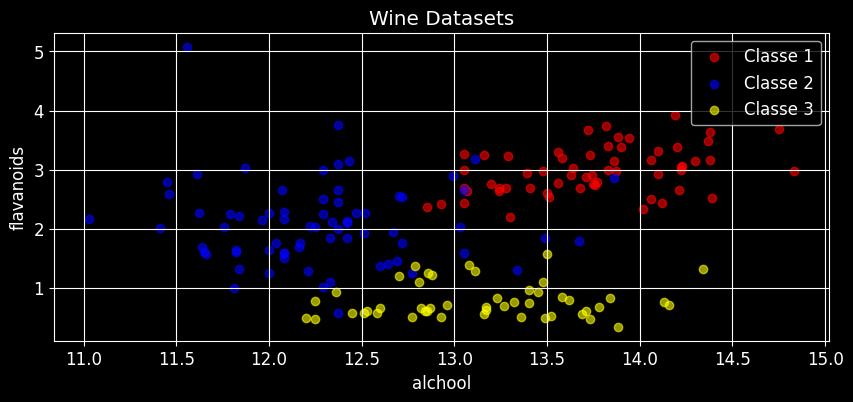

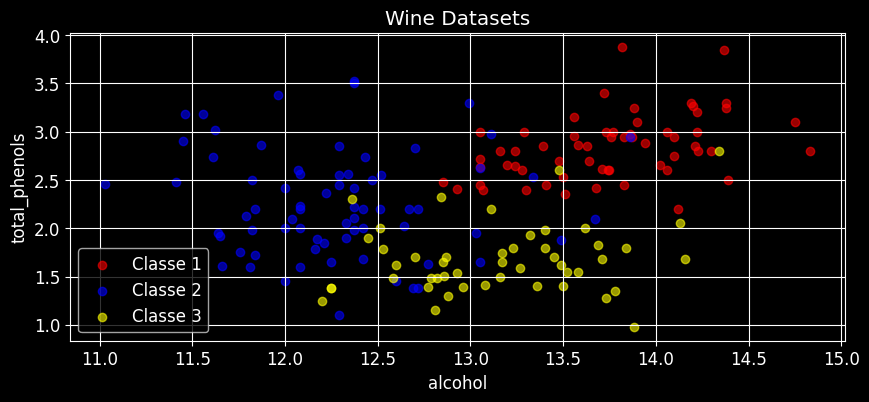

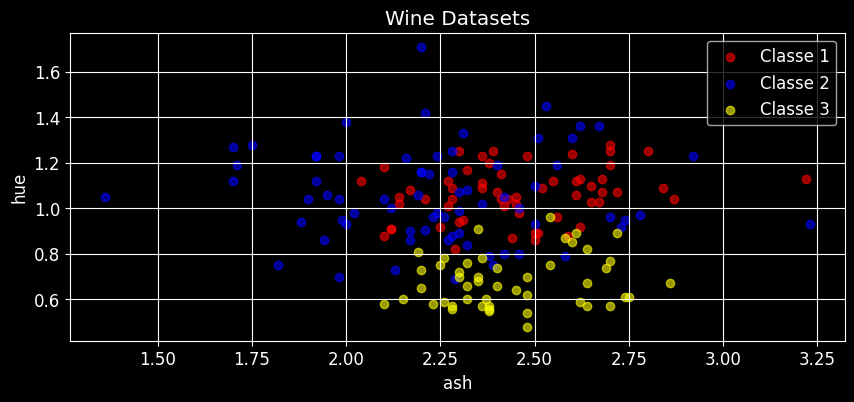

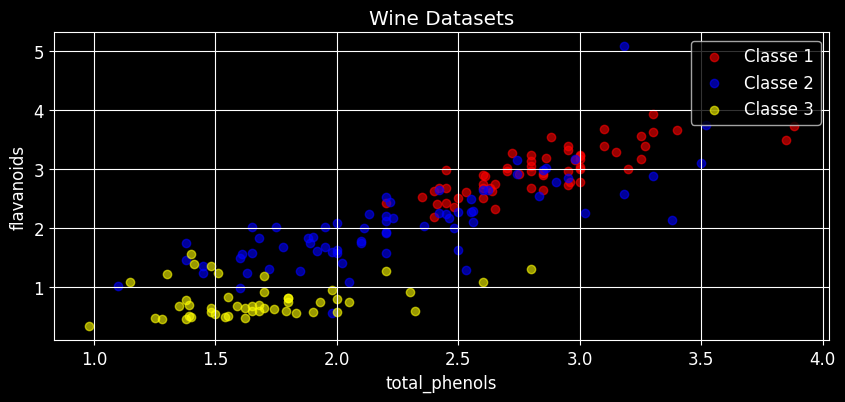

In [8]:
class_1 = df_wine[df_wine.target == 0.0]
class_2 = df_wine[df_wine.target == 1.0]
class_3 = df_wine[df_wine.target == 2.0]

ig, ax = plt.subplots()
ax.scatter(class_1['alcohol'], class_1['flavanoids'], alpha=0.6, color="red", label="Classe 1")
ax.scatter(class_2['alcohol'], class_2['flavanoids'], alpha=0.6, color="blue", label="Classe 2")
ax.scatter(class_3['alcohol'], class_3['flavanoids'], alpha=0.6, color="yellow", label="Classe 3")

ax.set_xlabel("alchool")
ax.set_ylabel("flavanoids")
ax.grid()
ax.set_title("Wine Datasets")
ax.legend()

ig, ax = plt.subplots()
ax.scatter(class_1['alcohol'], class_1['total_phenols'], alpha=0.6, color="red", label="Classe 1")
ax.scatter(class_2['alcohol'], class_2['total_phenols'], alpha=0.6, color="blue", label="Classe 2")
ax.scatter(class_3['alcohol'], class_3['total_phenols'], alpha=0.6, color="yellow", label="Classe 3")

ax.set_xlabel("alcohol")
ax.set_ylabel("total_phenols")
ax.grid()
ax.set_title("Wine Datasets")
ax.legend()

ig, ax = plt.subplots()
ax.scatter(class_1['ash'], class_1['hue'], alpha=0.6, color="red", label="Classe 1")
ax.scatter(class_2['ash'], class_2['hue'], alpha=0.6, color="blue", label="Classe 2")
ax.scatter(class_3['ash'], class_3['hue'], alpha=0.6, color="yellow", label="Classe 3")

ax.set_xlabel("ash")
ax.set_ylabel("hue")
ax.grid()
ax.set_title("Wine Datasets")
ax.legend()


ig, ax = plt.subplots()
ax.scatter(class_1['total_phenols'], class_1['flavanoids'], alpha=0.6, color="red", label="Classe 1")
ax.scatter(class_2['total_phenols'], class_2['flavanoids'], alpha=0.6, color="blue", label="Classe 2")
ax.scatter(class_3['total_phenols'], class_3['flavanoids'], alpha=0.6, color="yellow", label="Classe 3")

ax.set_xlabel("total_phenols")
ax.set_ylabel("flavanoids")
ax.grid()
ax.set_title("Wine Datasets")
ax.legend()
class_3.head()

In [9]:
df_wine.describe(include = 'all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Preparação do Dataset
--


In [10]:
# Droping the target since we only need the measurements

X = df_wine.drop(columns = ['target'], axis=1)
X.describe(include = 'all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Vamos pegar as colunas de alcool e Flavanoids que tem uma relação interresante com visto antes no grafico acima
--

In [11]:
# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (0, 6)]  # 1rd and 5th columns
y = df_wine['target'].to_numpy().astype(int)


E depois separar o dataset nos conjuntos de treinamento ($70\%$) e teste ($30\%$). Novamente a ``Scikit-learn`` nos auxilia com a função ``train_test_split``.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')


Training: 124 instances 
Test: 54 instances

Training shape:(124, 2) 
First row:[13.49  0.48]

Test shape:(54, 2) 
First row:[13.64  3.03]

Labels 
	training: 124 instances 
	test: 54 instances

Labels training shape:(124,) 
set:[2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1
 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2
 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2
 1 1 1 1 1 1 2 0 1 1 0 1 1]

Labels test shape:(54,) 
set:[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


Treinamento do Perceptron
--


In [13]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)


(array([ 1.51611, -6.08702]), 0.32500000000000023)

Predição e Avaliação
--


In [14]:
pred = perceptron.predict(X_test)

Qual foi a acurácia?

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.41
[[ 2 17  0]
 [ 1 20  0]
 [ 0 14  0]]


Apenas $41\%$! 

Ruim para esse *dataset*. 

Bem, podemos usar a estratégia de tentar ajustar os hiperparâmetros (**hyperparameter tuning**). Por exemplo, aumentar a taxa de aprendizado (*learning rating* ou *epochs*) para digamos 1000.

In [16]:
perceptron = Perceptron(0.001, 1000)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.39
[[ 2 17  0]
 [ 2 19  0]
 [ 0 14  0]]


Piorou caimos para  $39\%$!

Agora Vamos normalizar as entradas Para tentar melhorar.

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')

Training: 124 instances 
Test: 54 instances

Training shape:(124, 2) 
First row:[ 0.62844732 -1.51706225]

Test shape:(54, 2) 
First row:[0.80742634 1.01578048]

Labels 
	training: 124 instances 
	test: 54 instances

Labels training shape:(124,) 
set:[2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1
 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2
 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2
 1 1 1 1 1 1 2 0 1 1 0 1 1]

Labels test shape:(54,) 
set:[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


In [18]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.63
[[15  4  0]
 [ 2 19  0]
 [ 0 14  0]]


$63\%$ e melhor mas ainda assim esta abaixo do aceitavel

Vamos tentar entender como a decisão foi tomada.

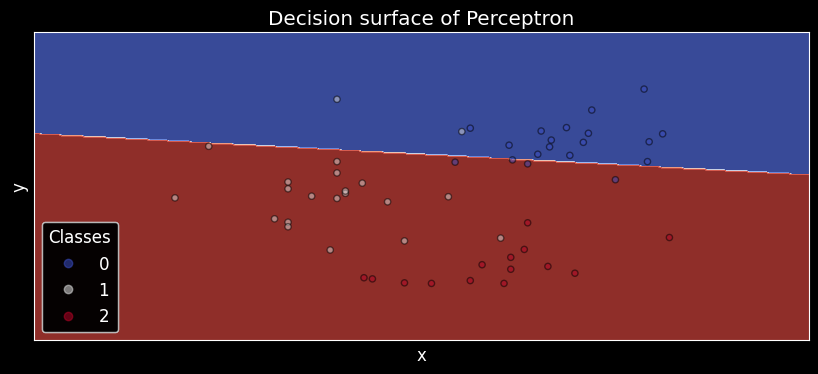

In [19]:
def make_meshgrid(x, y, h=.02):
    """
    Generate a meshgrid of points based on input data x, y.

    Parameters
    ----------
    x : array-like
        Input data for x-axis.
    y : array-like
        Input data for y-axis.
    h : float, optional
        Step size for the meshgrid. Default is 0.02.

    Returns
    -------
    xx : ndarray
         Meshgrid array for x-axis.
    yy : ndarray
         Meshgrid array for y-axis.
    """       
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """
    Plot the decision boundaries of a classifier as contours on a 2D plot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes on which to draw the contours.
    clf : sklearn.base.ClassifierMixin
        The classifier to use for predicting the class labels.
    xx : numpy.ndarray
        The x-coordinates of the points on the plot.
    yy : numpy.ndarray
        The y-coordinates of the points on the plot.
    **params : dict
        Additional parameters to pass to the `contourf()` function of the
        `matplotlib.axes.Axes` object.

    Returns
    -------
    out : matplotlib.contour.QuadContourSet
        The `QuadContourSet` object returned by the `contourf()` function.
    """    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z, **params)

    return out

fig, ax = plt.subplots()

title = 'Decision surface of Perceptron'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha = 0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


plt.show()

E como se comporta a implementação da ``Scikit-learn``? 

In [20]:
from sklearn.linear_model import Perceptron

sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(sk_perceptron_pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, sk_perceptron_pred))

Accuracy:0.91
[[18  1  0]
 [ 1 17  3]
 [ 0  0 14]]


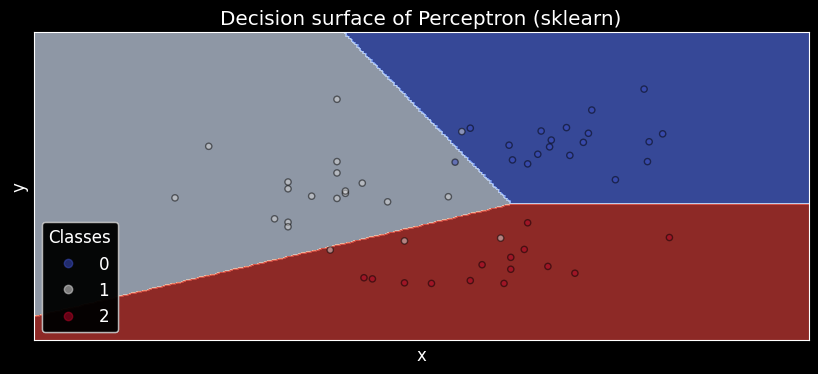

In [21]:
fig, ax = plt.subplots()

title = 'Decision surface of Perceptron (sklearn)'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sk_perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

Conseguiu $91\%$! E melhor desempenho entre as interclasse!

Modelo mais complexo, como um **SVM**.

In [22]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy using SVM, RBF kernel: {acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy using SVM, RBF kernel: 0.93
[[19  0  0]
 [ 1 18  2]
 [ 0  1 13]]


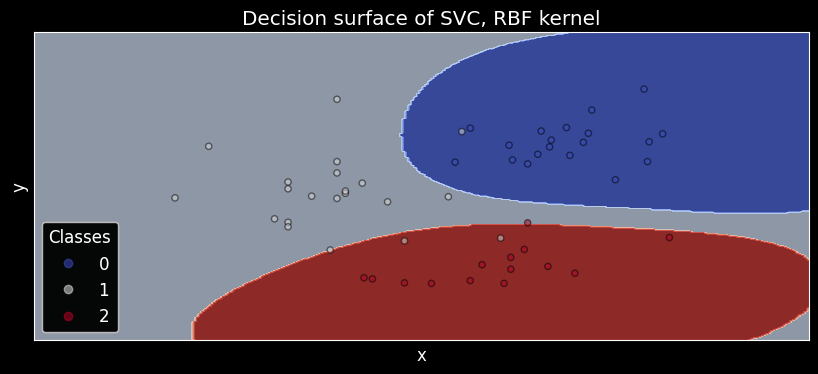

In [23]:
fig, ax = plt.subplots()


title = 'Decision surface of SVC, RBF kernel'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()